In [1]:
# Load, explore and plot data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# Train test split
from sklearn.model_selection import train_test_split
# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional

In [4]:
df = pd.read_csv('/content/Tagged_Mixed.csv')
# rename the columns

#df.head()
df

,Text,Target
0,polis tangkap,0
1,kenapa lokasi kebakaran terlalu spesifik,0
2,menyesal tanya nak for birthday,0
3,meriah tah,0
4,asal bs kelar kerja jam sik kl baru diajak mee...,0
...,...,...
1058,nanti lah nak khabar dengan member bintulu,0
1059,kekayaan milik,0
1060,petugas pejabat kesihatan daerah kuala kraitel...,0
1061,dekat ye,1


In [5]:
df.describe()

,Target
count,1063.000000
mean,0.143932
std,0.351186
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
!pip install matplotlib
!pip install pandas
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
a = df[df['Target'] == 0].Text

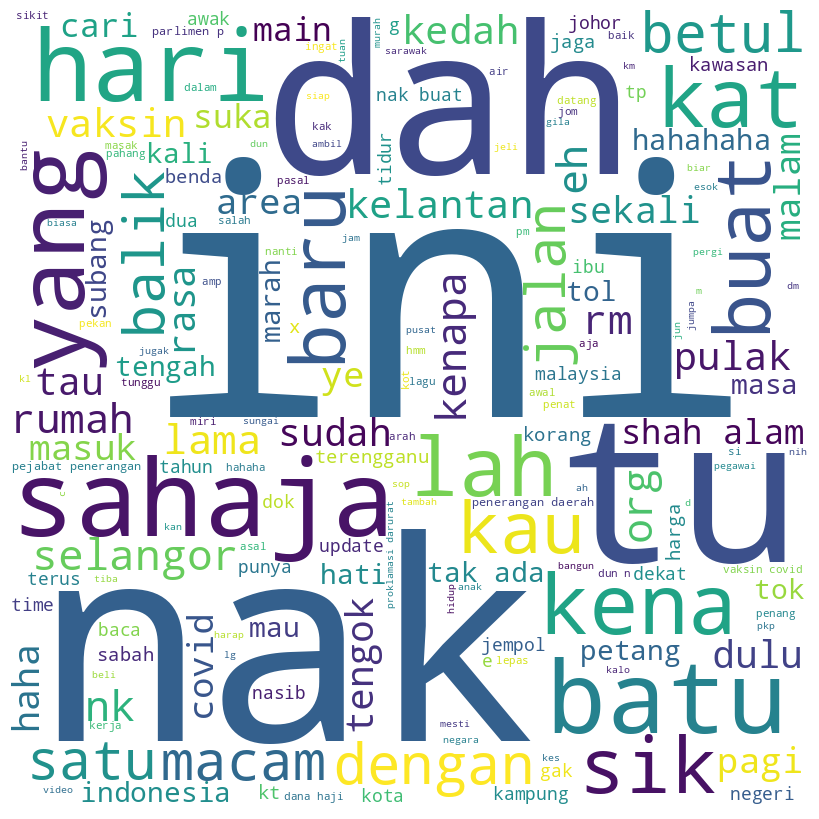

In [9]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd



comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in a:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [10]:
b = df[df['Target'] == 1].Text

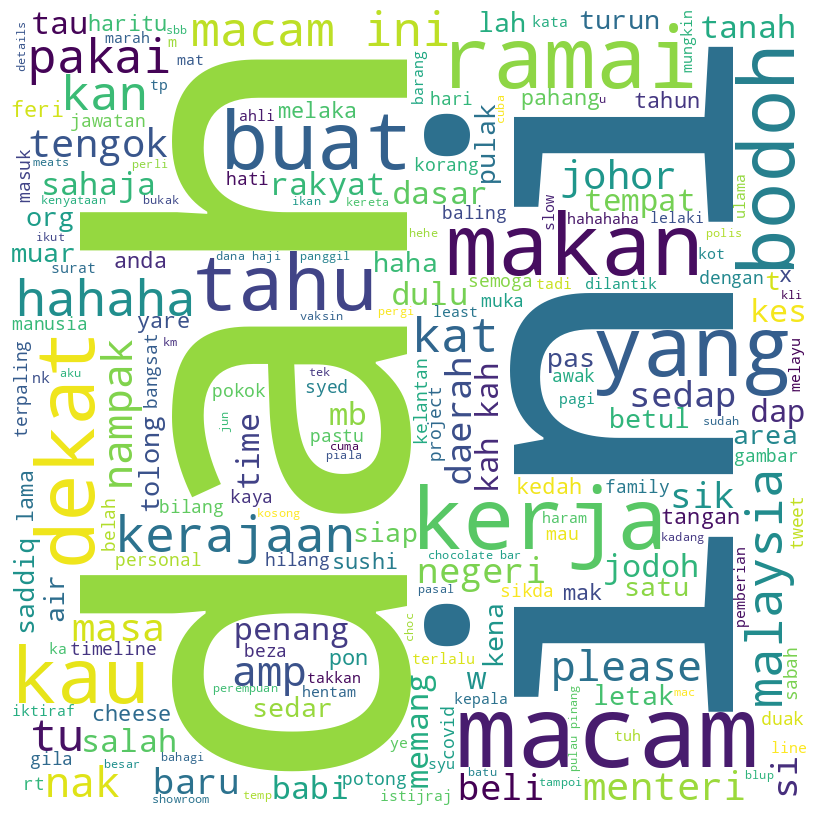

In [11]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd



comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in b:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [49]:
df.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [13]:
# Get length column for each text
df['text_length'] = df['Text'].apply(len)

df['msg_type'] = df['Target']
msg_label = df['msg_type'].values
df.head()

,Text,Target,text_length,msg_type
0,polis tangkap,0,14,0
1,kenapa lokasi kebakaran terlalu spesifik,0,41,0
2,menyesal tanya nak for birthday,0,32,0
3,meriah tah,0,11,0
4,asal bs kelar kerja jam sik kl baru diajak mee...,0,73,0


In [15]:
x_train, x_test, y_train, y_test = train_test_split(df['Text'], msg_label, test_size=0.2, random_state=434)

In [16]:
# Defining pre-processing parameters
max_len = 50 
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 500

In [47]:
tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(x_train)

In [48]:
training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

In [49]:
testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [50]:
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (850, 50)
Shape of testing tensor:  (213, 50)


In [51]:
# Define parameter
vocab_size = 500 
embedding_dim = 16
drop_value = 0.2
n_dense = 24
# Define Dense Model Architecture
model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_dim,
                    input_length = max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
____________________________________________________

In [53]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [54]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded,
                    y_train,
                    epochs=num_epochs, 
                    validation_data=(testing_padded, y_test),
                    callbacks =[early_stop],
                    verbose=2)

Epoch 1/30
27/27 - 1s - loss: 0.6521 - accuracy: 0.8553 - val_loss: 0.6163 - val_accuracy: 0.8545 - 1s/epoch - 50ms/step
Epoch 2/30
27/27 - 0s - loss: 0.5816 - accuracy: 0.8565 - val_loss: 0.5375 - val_accuracy: 0.8545 - 149ms/epoch - 6ms/step
Epoch 3/30
27/27 - 0s - loss: 0.4989 - accuracy: 0.8565 - val_loss: 0.4608 - val_accuracy: 0.8545 - 300ms/epoch - 11ms/step
Epoch 4/30
27/27 - 0s - loss: 0.4404 - accuracy: 0.8565 - val_loss: 0.4191 - val_accuracy: 0.8545 - 321ms/epoch - 12ms/step
Epoch 5/30
27/27 - 0s - loss: 0.4105 - accuracy: 0.8565 - val_loss: 0.4088 - val_accuracy: 0.8545 - 199ms/epoch - 7ms/step
Epoch 6/30
27/27 - 0s - loss: 0.4065 - accuracy: 0.8565 - val_loss: 0.4076 - val_accuracy: 0.8545 - 175ms/epoch - 6ms/step
Epoch 7/30
27/27 - 0s - loss: 0.4016 - accuracy: 0.8565 - val_loss: 0.4068 - val_accuracy: 0.8545 - 166ms/epoch - 6ms/step
Epoch 8/30
27/27 - 0s - loss: 0.4059 - accuracy: 0.8565 - val_loss: 0.4060 - val_accuracy: 0.8545 - 194ms/epoch - 7ms/step
Epoch 9/30
27/27

In [55]:
model.evaluate(testing_padded, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3522 - accuracy: 0.8592


[0.352228581905365, 0.8591549396514893]

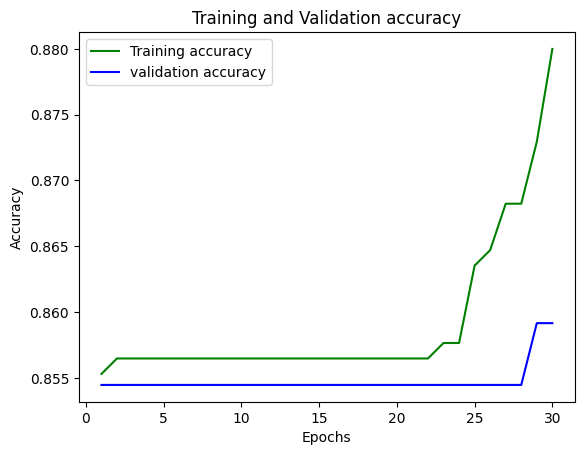

In [62]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Long Short Term Memory(LSTM)

In [63]:
# Define parameter
n_lstm = 128
drop_lstm = 0.2
# Define LSTM Model 
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model1.add(SpatialDropout1D(drop_lstm))
model1.add(LSTM(n_lstm, return_sequences=False))
model1.add(Dropout(drop_lstm))
model1.add(Dense(1, activation='sigmoid'))

In [65]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            8000      
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 16)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               74240     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 82,369
Trainable params: 82,369
Non-trainable params: 0
__________________________________________________

In [66]:
model1.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [67]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padded,
                     y_train,
                     epochs=num_epochs, 
                     validation_data=(testing_padded, y_test),
                     callbacks =[early_stop],
                     verbose=2)

Epoch 1/30
27/27 - 5s - loss: 0.5014 - accuracy: 0.8365 - val_loss: 0.4185 - val_accuracy: 0.8545 - 5s/epoch - 186ms/step
Epoch 2/30
27/27 - 3s - loss: 0.4168 - accuracy: 0.8565 - val_loss: 0.4148 - val_accuracy: 0.8545 - 3s/epoch - 93ms/step
Epoch 3/30
27/27 - 2s - loss: 0.4108 - accuracy: 0.8565 - val_loss: 0.4163 - val_accuracy: 0.8545 - 2s/epoch - 89ms/step
Epoch 4/30
27/27 - 2s - loss: 0.4143 - accuracy: 0.8565 - val_loss: 0.4168 - val_accuracy: 0.8545 - 2s/epoch - 70ms/step


In [68]:
model1.evaluate(testing_padded, y_test)

7/7 [==============================] - 0s 27ms/step - loss: 0.4168 - accuracy: 0.8545


[0.41683512926101685, 0.8544601202011108]